# Introducing Scikit-Learn
A benefit of this **uniformity** is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to new model or algorithm is very straightforward.  

Overview of the Scikit-Learn API

```python
# will be used
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.mixture import GMM 
from sklearn.manifold import Isomap
from sklearn.metrics import confusion_matrix

```

## Data Representation in Scikit-Learn
Data within Scikit-Learn is in terms of **tables of data.**

### Data as table
Two-dimensional grid of data, where the rows individual elements, the columns represent quantities.

In [2]:
import seaborn as sns

In [3]:
iris = sns?

In [4]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [7]:
# rows    == SAMPLES  ; n_samples
# columns == FEATURES ; n_features

#### Features matrix
The table, 2-d, which we will call the _feature matrix_.  
By convention, is often stored in a variable named `X`.  

2-d with shape `[n_samples, n_features]`, in NumPy array or a Pandas `DataFrame`  
, some accept SciPy sparse matrices, as well.

#### Target array
with `X` , a _label_ or _target_ array `y`  
usually 1-d with length of `n_samples` in NumPy or Pandas `Series`  
Some Scikit-Learn, 2-d with `[n_samples, n_targets]`  

Target is what we want to _predict from the data_: in statistical terms,  
it is **the dependent variable**.  

In this case, `species` column would be considered the target array.

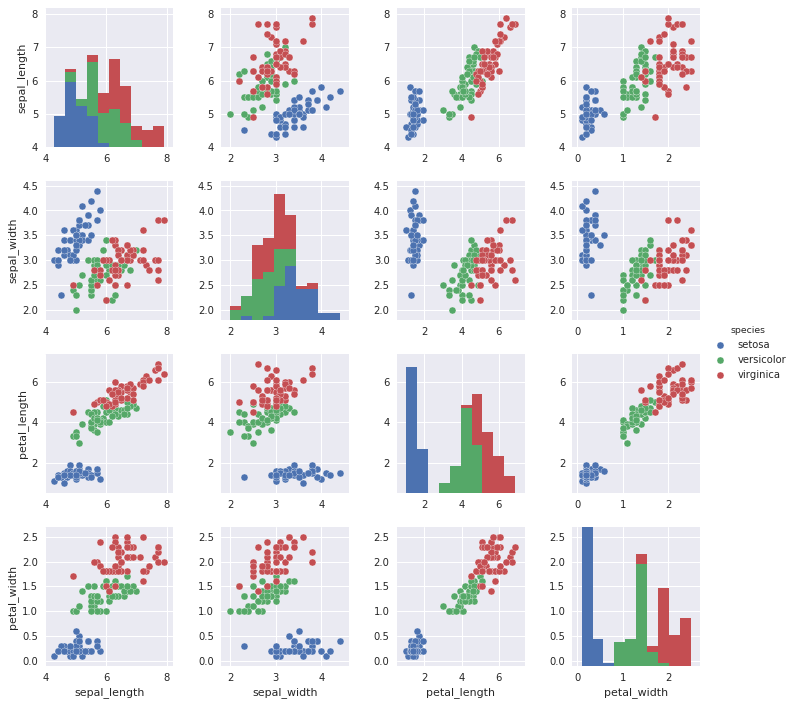

In [13]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=2.5);

In [14]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [15]:
y_iris = iris['species']
y_iris.shape

(150,)

In [17]:
import matplotlib.pyplot as plt

In [57]:
!mkdir figures

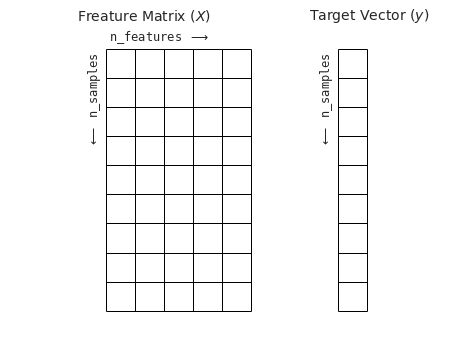

In [58]:
# APPENDIX
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, 10, "Freature Matrix ($X$)", size=14);
ax.text(0.1, 9.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 8.9, r'$\longleftarrow$ n_samples', rotation=90, 
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, 10, "Target Vector ($y$)", size=14);
ax.text(7.9, 8.9, r'$\longleftarrow$ n_samples', rotation=90, 
       va='top', ha='right', **font_prop)

# ax.set_ylim(10, -2)

fig.savefig('figures/05.02-samples-features.png')

## Scikit-Learn's Estimator API
* _Consistency_  
* _Inspection_  
* _Limited object hierarchy_   
* _Composition_  
* _Sensible defaults_  

### Basics of the API
using the Scikit-Learn estimator API are as follows  
1. Choose _a class of model_ by importing the appropriate **estimator class** from Scikit-Learn.  
2. Choose model hyperparameters by instantiating this class with desired values.  
3. Arrange data into a **features matrix** and **target vector** following the discussion above.  
4. Fit the model to your data by calling the `fit()` method of the model instance.  
5. Apply the Model to new data:  
    * For supervised learning, often we predict labels for unknown data using the `predict()` method.  
    * For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.  

### Supervised learning example: Simple linear regression
Common case of fitting a line to $(x, y)$ data. 

In [59]:
import numpy as np

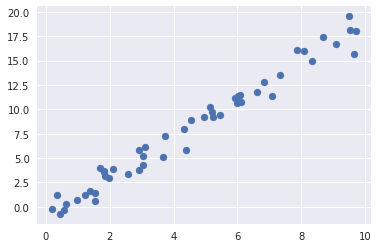

In [60]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

If we would like to compute a simple _linear regression model_,  
we can import the _linear regression class_.

In [62]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters
_a class of model_ is **not the same** _as an instance of a model_.  

* Would we like to fit for the offset (i.e. _y_-intercept)?  
* Would we like the model to be normalized?  
* Would we like to preprocess our features to add model flexibility?  
* What degree of regularization would we like to use in our model?  
* How many model components would we like to use?  <br>

There are examples of the important choices, once the model class is selected.  
These are often represented as _**Hyperparameters**_, or parameters that must be set before the model is fit to data.  

we can instantiate the `LinearRegression` class and  
specify that we would like to fit the _intercept_ using the `fit_intercept` hyperparameter.

In [64]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

So far, the only action is the storing of these hyperparameter values.  
Scikit-Learn API makes very clear the distinction between _choice of model_ and _application of model to data_.  

#### 3. Arrange data into a features matrix target vector

In [67]:
x.shape

(50,)

In [68]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

In [69]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This `fit()` command causes a number of **model-dependent** internal computations to take place, and the **results** of these computations are stored in model-specific **attributes** that the user can explore.  
All model parameters that were learned during the `fit()` process have _trailing underscores_; 

In [71]:
model.coef_

array([ 1.9776566])

In [72]:
model.intercept_

-0.90331072553111635

Scikit-Learn does not provide tools to draw conclusions from internal model parameters:  
Interpreting model parameters is much more a _statistical modeling_ question than a _machine learning_ question.  
ML rather focuses on what the model _predicts_. 

#### 5. Predict labels for unknown data
Once the model trained, the main task is to evaluate it, based on 'what it says about new data'.  
Using `predict()` method. 

In [73]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

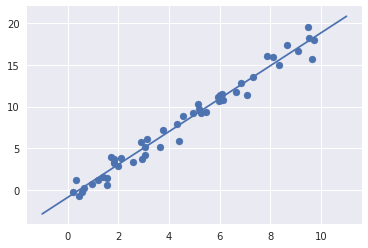

In [74]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Supervised learning example: Iris classification
_**Q) given a model trained on a portion of the Iris data, how well can we predict the remaining labels?**_  

**Gaussian naive Bayes**  
> so fast and no hyperparameters to choose  
> good model to use as a baseline classification <br>

Split the data into a _training set_ and a _testing set_.  
`train_text_split`


In [81]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, 
                                                random_state=1)
print(X_iris.shape, Xtrain.shape, Xtest.shape)
print(y_iris.shape, ytrain.shape, ytest.shape)

(150, 4) (112, 4) (38, 4)
(150,) (112,) (38,)


In [82]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

`accuracy_score` to see the fraction of predicted labels that match their true value: 

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

### Unsupervised learning example: Iris dimensionality
Let's take a look at **reducing the dimensionality** of the Iris data so as to more easily visualize it.  
Recall that the Iris data is four dimensional: 4 features recorded for each samples.

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that _retains the essential feartures_ of the data.  
Often it is used as an aid to visualizing data: after all, 2-d is much easier to plot data than in 4-d or higher!

**Principal Component Analysis (PCA)**  
a fast linear dimensionality reduction technique. We will ask the model to return _two components_-that is, a 2-d representation of the data. 

In [87]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
X_2D = model.transform(X_iris)        # 4. Transfrom the data to two dimensions
# Apply dimensionality reduction to X

In [91]:
print(X_iris.shape, X_2D.shape)

(150, 4) (150, 2)


In [92]:
X_iris.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [94]:
X_2D

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [95]:
iris.shape

(150, 5)

In [96]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [97]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
iris.head()

sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  
0  0.319397  
1 -0.177001  
2 -0.144949  
3 -0.318299  
4  0.326755

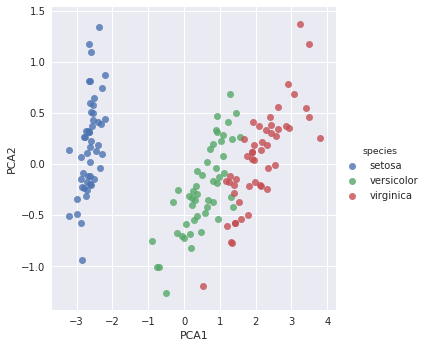

In [100]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

### Unsupervised learning: Iris clustering
A clustering algorithm attempts to find distinct groups of data without reference to any labels.  
A powerful clustering method called a **Gaussian mixture model (GMM)**.  
A **GMM** attempts to model the data as a collection of Gaussian blobs.

In [103]:
from sklearn.mixture import GMM     # 1. Choose the model class
model = GMM(n_components=3, 
            covariance_type='full') # 2. Instantiate w/ hyper.. 
model.fit(X_iris)                   # 3. Fit to data. y is not specified.
y_gmm = model.predict(X_iris)       # 4. Determine cluster labels

/home/msphan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/msphan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/msphan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/msphan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecatio

In [105]:
X_iris.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [104]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  
0  0.319397  
1 -0.177001  
2 -0.144949  
3 -0.318299  
4  0.326755

In [113]:
iris['cluster'] = y_gmm
iris.head()

sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  cluster  
0  0.319397        1  
1 -0.177001        1  
2 -0.144949        1  
3 -0.318299        1  
4  0.326755        1

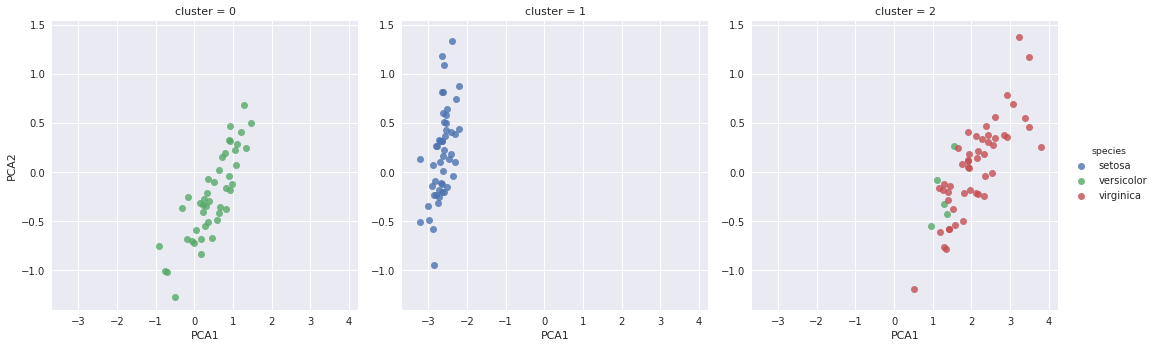

In [114]:
sns.lmplot("PCA1", "PCA2", data=iris, 
           hue='species', ## known, colors
           col='cluster', ## real job here, classify by clusters
           fit_reg=False);

By splitting the data by cluster number!  
Well recovered labels

## Application: Exploring Hand-written Digits
This problem involves both locating and identifying characters in an image.

### Loading and visualizing the digits data

In [118]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [148]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

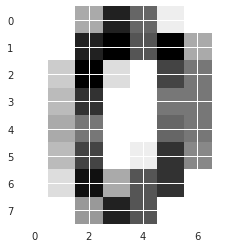

In [147]:
plt.imshow(digits.images[0], cmap='binary', interpolation='nearest')

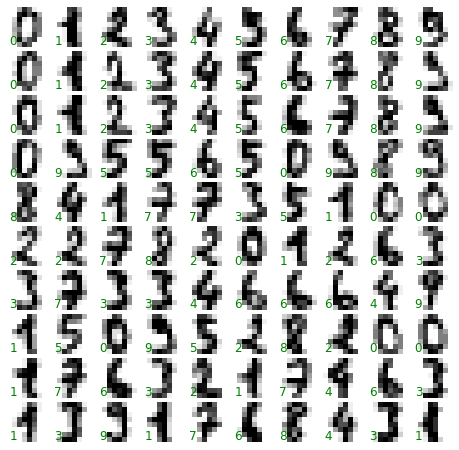

In [141]:
fig, axes = plt.subplots(10, 10, figsize=(8,8), 
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), 
            transform=ax.transAxes, color='green')

In order to work within Scikit-Learn, need 2-d `[n_samples, n_features]`  
by treating each pixel in the image as a feature, by **flattening out** the pixel array so that we have a **length-64** array of pixel values.  
Additionally, we need the **target array**

In [149]:
X = digits.data
X.shape

(1797, 64)

In [150]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction
It is difficult to effectively visualize points in such a _high-dimensional space_.  
Reduce the dimentions to 2, using an **unsupervised method**.  
Here, we will make use of a **manifold learning algorithm** called _**Isomap**_,  
and transform the data to 2-d

In [152]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data) ## the same as 'X'

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [153]:
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

/home/msphan/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


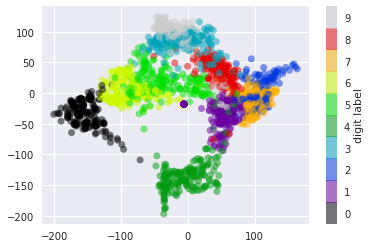

In [162]:
fig = plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
                  edgecolor='none', alpha=0.5, 
                  cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

Well separated in the larger 64-d space. For examples, zeros (in black) and ones (in purple) have very little overlap in _parameter space_.  

### Classification on digits
Split data in a set of training and a set of test, and fit a GaussianNB

In [164]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
print(Xtrain.shape, Xtest.shape)
print(ytrain.shape, ytest.shape)

(1347, 64) (450, 64)
(1347,) (450,)


In [170]:
# from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)
y_model.shape

(450,)

In [168]:
# from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

80% is good enough!  
However, this single number doesn't tell us much, like _where we've gone wrong?_  
One nice way to do this is to use the **confusion matrix**, which we can compute with Scikit-Learn and plot with Seaborn:

In [172]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
mat.shape

(10, 10)

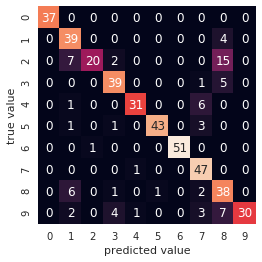

In [173]:
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the **mis-labeled points** tend to be.  
We will use <font color='green'>green</font> for correct labels, and <font color='red'>red</font> for incorrect labels:

In [176]:
Xtest.shape

(450, 64)

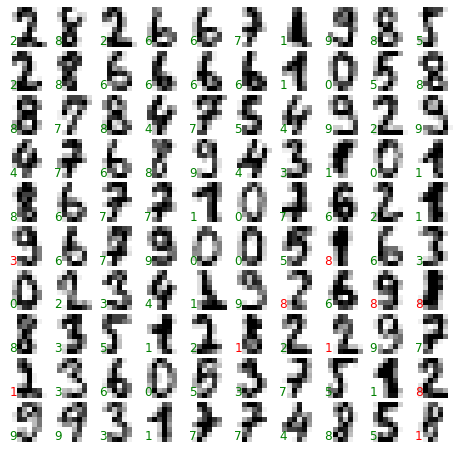

In [180]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8), 
                         subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)
# test_images.shape

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), 
            transform=ax.transAxes, 
            color='green' if (ytest[i] == y_model[i]) else 'red')

Can get insight regarding where the algorithm might be not performing optimally.   
To go _beyond_ 80% classification rate, move to a more **sophisticated algorithm** such as support _**vector machines**_, _**random forests**_ or another classification approch.

## Summary

The essential features of the _Scikit-Learn_  
* data representation  
* the estimator API  
* the same **import/instantiate/fit/predict** pattern  